### We are going to predict the sales using advertising data

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv("/home/mindlessmagnet/Github/AI-Daily-Tasks/4. Dataset & Algorithms (10-11-22)/Muhammed Shajahan/advertising.csv")

In [5]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot: >

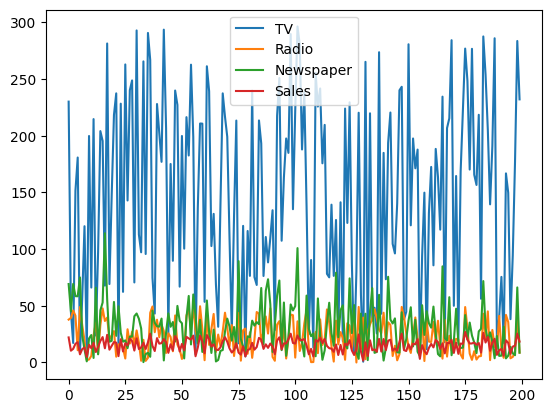

In [7]:
df.plot()

<AxesSubplot: >

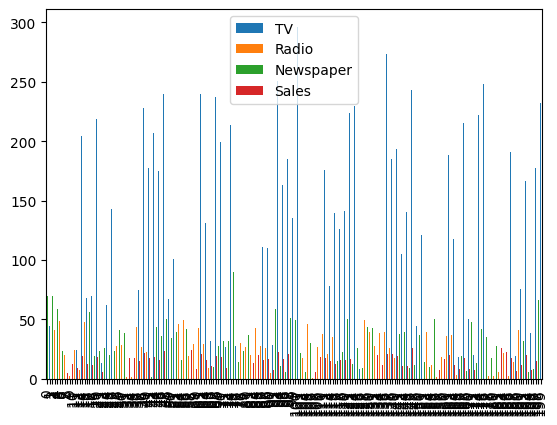

In [20]:
df.plot(kind='bar')

<AxesSubplot: ylabel='Frequency'>

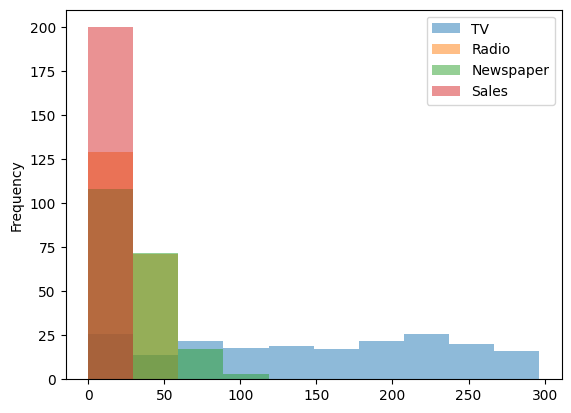

In [21]:
df.plot.hist(alpha=0.5)

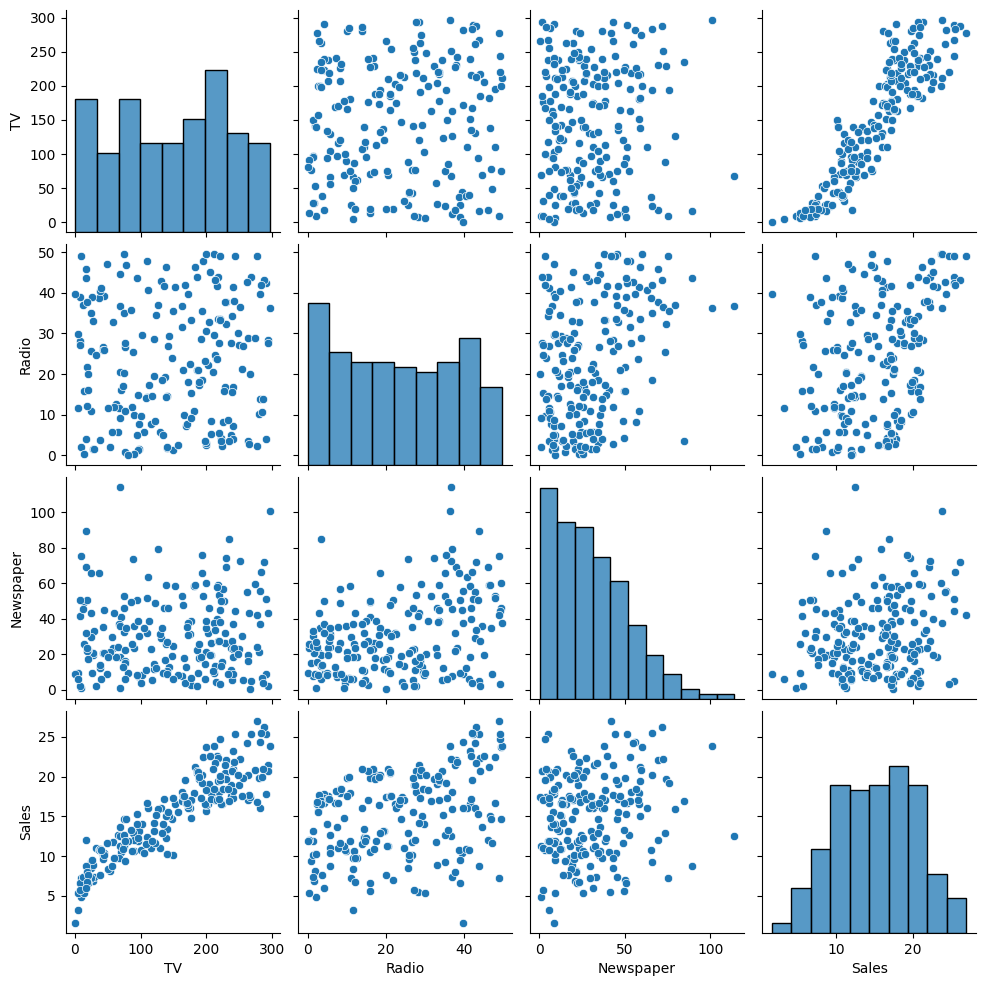

In [8]:
sns.pairplot(df)

<AxesSubplot: >

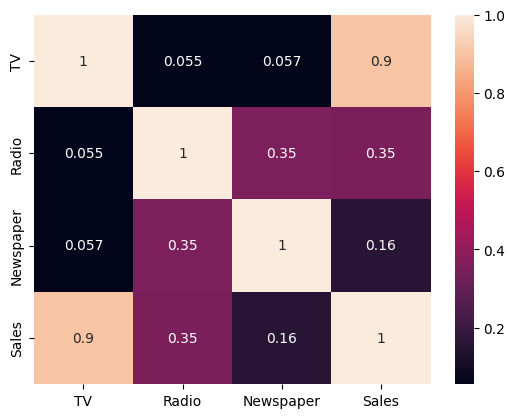

In [9]:
sns.heatmap(df.corr(), annot=True)

### We can see that the correlation between the TV and Sales is 0.9, which is a strong positive correlation. So, we can use TV as our independent variable.

In [10]:
X = df['TV']
Y = df['Sales']
sc = StandardScaler()
X=sc.fit_transform(X.values.reshape(-1,1))
Y=sc.fit_transform(Y.values.reshape(-1,1))

### We dropped Radio and Newspaper columns because they have very low correlation with Sales

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_pred=lr.predict(X_test)

In [14]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [15]:
print("R2 Score: ", r2_score(Y_test, Y_pred))
print("Mean Squared Error: ", mean_squared_error(Y_test, Y_pred))

R2 Score:  0.7241962282650847
Mean Squared Error:  0.19093850745311527


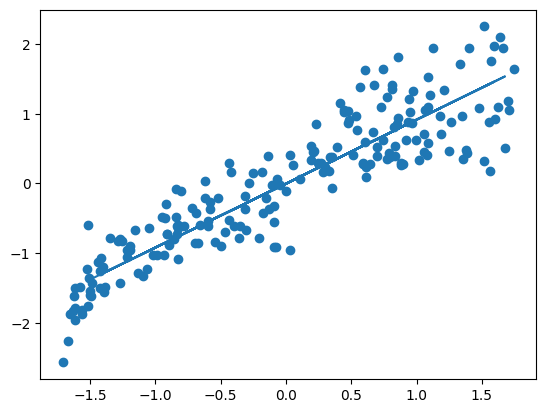

In [16]:
plt.scatter(X, Y)
plt.plot(X_test, Y_pred)
plt.show()